<a href="https://colab.research.google.com/github/PritomKarmokar/coronaVirusClassifier/blob/main/coronaVirusClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing Phase

### Importing necessary libaries

In [ ]:
import csv
import pandas as pd
import numpy as np

In [ ]:
### Function for converting 'fasta ' files into csv
def convert_fasta_to_csv(fasta_file, csv_file):
    # Step 1: Load the FASTA file
    with open(fasta_file, 'r') as f:
        fasta_content = f.readlines()

    # Step 2: Parse the FASTA data
    sequences = []
    current_sequence = ''
    current_id = ''
    for line in fasta_content:
        if line.startswith('>'):
            if current_sequence:
                sequences.append((current_id, current_sequence))
            current_id = line[1:].strip()
            current_sequence = ''
        else:
            current_sequence += line.strip()
    if current_sequence:
        sequences.append((current_id, current_sequence))

    # Step 3: Create a CSV file
    with open(csv_file, 'w', newline='') as f:
        writer = csv.writer(f)

        # Step 4: Write headers
        writer.writerow(['Sequence ID', 'Sequence'])

        # Step 5: Write data rows
        for sequence in sequences:
            writer.writerow(sequence)

    print(f'Conversion complete. CSV file saved as {csv_file}.')

In [ ]:
### function for counting no. of sequences presented in the file
def count_sequences(filename):
    count = 0
    with open(filename, "r") as file:
        for line in file:
            if line.startswith(">"):
                count += 1
    return count

In [ ]:
### Function for finding maximum length from the sequence
def maxSeq_length(data):
    res = max([len(seq) for seq in data])
    return res

In [ ]:
### Function for finding minimum length from the sequence
def minSeq_length(data):
    res = min([len(seq) for seq in data])
    return res

## Loading the data

In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = '/content/drive/MyDrive/drive_for_data/covid_data/coronavirus/ndgc/'
print(datapath)
files = os.listdir(datapath)
files

/content/drive/MyDrive/drive_for_data/covid_data/coronavirus/ndgc/


['SARSr-COV.fasta',
 'SARS-CoV2.fasta',
 'HCoV-OC43.fasta',
 'HCoV-229E.fasta',
 'HCoV-NL63.fasta',
 'HCoV-HKU1.fasta',
 'mers_sequence.fasta']

### Working with SARS-CoV-2 genome sequences

In [ ]:
convert_fasta_to_csv(datapath + 'SARS-CoV2.fasta', 'sars-cov2.csv')

Conversion complete. CSV file saved as sars-cov2.csv.


In [ ]:
df_sarsCov2 = pd.read_csv('sars-cov2.csv')
df_sarsCov2['strain_name'] = 'sars-cov2'
print(f"shape of sarsCov2 dataframe = {df_sarsCov2.shape}")

shape of sarsCov2 dataframe = (400, 3)


In [ ]:
df_sarsCov2.head(2)

,Sequence ID,Sequence,strain_name
0,NC_045512.2 |Severe acute respiratory syndrome...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2
1,OR177857.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2


In [ ]:
## finding unique values
df_sarsCov2['Sequence'].nunique()

397

In [ ]:
# Removing duplicate rows based on 'Sequence' column
df_sarsCov2 = df_sarsCov2.drop_duplicates(subset='Sequence',ignore_index=True)
df_sarsCov2

,Sequence ID,Sequence,strain_name
0,NC_045512.2 |Severe acute respiratory syndrome...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2
1,OR177857.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2
2,OR177858.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2
3,OR177859.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2
4,OR177860.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2
...,...,...,...
392,OR150936.1 |Severe acute respiratory syndrome ...,CANNCCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGA...,sars-cov2
393,OR150937.1 |Severe acute respiratory syndrome ...,CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...,sars-cov2
394,OR150938.1 |Severe acute respiratory syndrome ...,TACCTTCCTAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGAT...,sars-cov2
395,OR150939.1 |Severe acute respiratory syndrome ...,CTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...,sars-cov2


In [ ]:
### After removing duplicate vaules
print(f"shape of sarsCov2 dataframe = {df_sarsCov2.shape}")

shape of sarsCov2 dataframe = (397, 3)


In [ ]:
max_len_sarsCov2 = maxSeq_length(df_sarsCov2['Sequence'])
max_len_sarsCov2

29903

In [ ]:
min_len_sarsCov2 = minSeq_length(df_sarsCov2['Sequence'])
min_len_sarsCov2

29319

In [ ]:
## Labeling 'sars-Cov2' as '0'
df_sarsCov2['label'] = 0
df_sarsCov2.head(2)

,Sequence ID,Sequence,strain_name,label
0,NC_045512.2 |Severe acute respiratory syndrome...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2,0
1,OR177857.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0


## Working with MERS-CoV Genome Sequences

In [ ]:
convert_fasta_to_csv(datapath + 'mers_sequence.fasta', 'mers-cov.csv')

Conversion complete. CSV file saved as mers-cov.csv.


In [ ]:
df_mersCov = pd.read_csv('mers-cov.csv')
df_mersCov['strain_name'] = 'mers-cov'
df_mersCov.shape

(1345, 3)

In [ ]:
## finding unique values
df_mersCov['Sequence'].nunique()

1002

In [ ]:
# Remove duplicate rows based on 'Sequence' column
df_mersCov = df_mersCov.drop_duplicates(subset='Sequence',ignore_index=True)
df_mersCov.shape

(1002, 3)

In [ ]:
df_mersCov.head()

,Sequence ID,Sequence,strain_name
0,NC_038294 |Betacoronavirus England 1| complete...,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,mers-cov
1,NC_019843 |Middle East respiratory syndrome co...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,mers-cov
2,MG987420 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
3,MG987421 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
4,MN541264 |Middle East respiratory syndrome-rel...,TGTTGATTGTAAACAGTACGTTTGCAATGGTTTCCAGAAGTGTGAG...,mers-cov


In [ ]:
max_len_mersCov = maxSeq_length(df_mersCov['Sequence'])
max_len_mersCov

30484

In [ ]:
min_len_mersCov = minSeq_length(df_mersCov['Sequence'])
min_len_mersCov

110

In [ ]:
### containing all the 'sequences' whose length is greater than '25000'
df_mersCov = df_mersCov[(df_mersCov['Sequence'].str.len() > 25000)]
print(df_mersCov.shape)

(537, 3)


In [ ]:
df_mersCov

,Sequence ID,Sequence,strain_name
0,NC_038294 |Betacoronavirus England 1| complete...,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,mers-cov
1,NC_019843 |Middle East respiratory syndrome co...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,mers-cov
2,MG987420 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
3,MG987421 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
30,MN723544 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,mers-cov
...,...,...,...
997,KF186565 |Middle East respiratory syndrome cor...,AACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGCGT...,mers-cov
998,KF192507 |Middle East respiratory syndrome cor...,AAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAA...,mers-cov
999,KF186564 |Middle East respiratory syndrome cor...,CGTTCTCCTGCAGAACTTTGATTTTAACGAACTTAAATAAAAGCCC...,mers-cov
1000,KC776174 |Human betacoronavirus 2c Jordan-N3/2...,CAGAACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAG...,mers-cov


In [ ]:
df_mersCov = df_mersCov.reset_index(drop=True)
df_mersCov

,Sequence ID,Sequence,strain_name
0,NC_038294 |Betacoronavirus England 1| complete...,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,mers-cov
1,NC_019843 |Middle East respiratory syndrome co...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,mers-cov
2,MG987420 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
3,MG987421 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCCTAGCTATCTCACCCCCTCTCGTTCTCTTG...,mers-cov
4,MN723544 |Middle East respiratory syndrome-rel...,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...,mers-cov
...,...,...,...
532,KF186565 |Middle East respiratory syndrome cor...,AACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGCGT...,mers-cov
533,KF192507 |Middle East respiratory syndrome cor...,AAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAA...,mers-cov
534,KF186564 |Middle East respiratory syndrome cor...,CGTTCTCCTGCAGAACTTTGATTTTAACGAACTTAAATAAAAGCCC...,mers-cov
535,KC776174 |Human betacoronavirus 2c Jordan-N3/2...,CAGAACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAG...,mers-cov


In [ ]:
## Labeling 'MERS-CoV' as 1
df_mersCov['label'] = 1
df_mersCov.head(2)

,Sequence ID,Sequence,strain_name,label
0,NC_038294 |Betacoronavirus England 1| complete...,ATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGC...,mers-cov,1
1,NC_019843 |Middle East respiratory syndrome co...,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...,mers-cov,1


## Working with HCoV-OC43 Genome Sequences

In [ ]:
convert_fasta_to_csv(datapath + 'HCoV-OC43.fasta','hcov_oc43.csv')

Conversion complete. CSV file saved as hcov_oc43.csv.


In [ ]:
df_hCov_oc43 = pd.read_csv('hcov_oc43.csv')
df_hCov_oc43['strain_name'] = 'hcov-OC43'
df_hCov_oc43.head()

,Sequence ID,Sequence,strain_name
0,NC_006213.1 |Human coronavirus OC43 strain ATC...,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...,hcov-OC43
1,OQ828657.1 |Human coronavirus OC43 isolate HCo...,GCTTTCAGCCAGGGACGTGTTGTATCCTAGGCAGTGGCCCTCCCAT...,hcov-OC43
2,LC756669.1 |Human coronavirus OC43 HCoVOC43_Fu...,ATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTT...,hcov-OC43
3,LC756670.1 |Human coronavirus OC43 HCoVOC43_Fu...,ATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTT...,hcov-OC43
4,ON461794.1 |Human coronavirus OC43 isolate OC4...,GCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTTTTGTAATC...,hcov-OC43


In [ ]:
df_hCov_oc43.shape

(200, 3)

In [ ]:
max_len_hCov_oc43 = maxSeq_length(df_hCov_oc43['Sequence'])
max_len_hCov_oc43

31104

In [ ]:
min_len_hCov_oc43 = minSeq_length(df_hCov_oc43['Sequence'])
min_len_hCov_oc43

123

In [ ]:
df_hCov_oc43 = df_hCov_oc43[(df_hCov_oc43['Sequence'].str.len() > 25000)]
df_hCov_oc43.shape

(117, 3)

In [ ]:
## Labeling 'hcov-OC43' as '2'
df_hCov_oc43['label'] = 2
df_hCov_oc43.head()

,Sequence ID,Sequence,strain_name,label
0,NC_006213.1 |Human coronavirus OC43 strain ATC...,ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTG...,hcov-OC43,2
1,OQ828657.1 |Human coronavirus OC43 isolate HCo...,GCTTTCAGCCAGGGACGTGTTGTATCCTAGGCAGTGGCCCTCCCAT...,hcov-OC43,2
2,LC756669.1 |Human coronavirus OC43 HCoVOC43_Fu...,ATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTT...,hcov-OC43,2
3,LC756670.1 |Human coronavirus OC43 HCoVOC43_Fu...,ATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTT...,hcov-OC43,2
4,ON461794.1 |Human coronavirus OC43 isolate OC4...,GCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCTTTTTGTAATC...,hcov-OC43,2


## Working with HCoV-229E Genome Sequences


In [ ]:
convert_fasta_to_csv(datapath + 'HCoV-229E.fasta','hcov_229E.csv')

Conversion complete. CSV file saved as hcov_229E.csv.


In [ ]:
df_hCov_229e = pd.read_csv('hcov_229E.csv')
df_hCov_229e['strain_name'] = 'hcov-229E'
df_hCov_229e.head()

,Sequence ID,Sequence,strain_name
0,NC_028752.1 |Camel alphacoronavirus isolate ca...,ACTTAAGTGTCTTATCTATCTATAGATAGAAAAGTCGCTTTTTAGA...,hcov-229E
1,"NC_002645.1 |Human coronavirus 229E, complete ...",ACTTAAGTACCTTATCTATCTACAGATAGAAAAGTTGCTTTTTAGA...,hcov-229E
2,OQ920097.1 |Mutant Human coronavirus 229E isol...,TTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGTCTA...,hcov-229E
3,OQ920098.1 |Mutant Human coronavirus 229E isol...,TTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGTCTA...,hcov-229E
4,OQ920099.1 |Mutant Human coronavirus 229E isol...,TTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGTCTA...,hcov-229E


In [ ]:
df_hCov_229e.shape

(200, 3)

In [ ]:
max_len_hCov_229e = maxSeq_length(df_hCov_229e['Sequence'])
max_len_hCov_229e

27395

In [ ]:
min_len_hCov_229e = minSeq_length(df_hCov_229e['Sequence'])
min_len_hCov_229e

286

In [ ]:
df_hCov_229e = df_hCov_229e[(df_hCov_229e['Sequence'].str.len() > 25000)] # 29903
df_hCov_229e.shape

(80, 3)

In [ ]:
## Labeling 'hCov_229e' as '3'
df_hCov_229e['label'] = 3
df_hCov_229e.head()

,Sequence ID,Sequence,strain_name,label
0,NC_028752.1 |Camel alphacoronavirus isolate ca...,ACTTAAGTGTCTTATCTATCTATAGATAGAAAAGTCGCTTTTTAGA...,hcov-229E,3
1,"NC_002645.1 |Human coronavirus 229E, complete ...",ACTTAAGTACCTTATCTATCTACAGATAGAAAAGTTGCTTTTTAGA...,hcov-229E,3
3,OQ920098.1 |Mutant Human coronavirus 229E isol...,TTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGTCTA...,hcov-229E,3
4,OQ920099.1 |Mutant Human coronavirus 229E isol...,TTATCTATCTACAGATAGAAAAGTTGCTTTTTAGACTTTGTGTCTA...,hcov-229E,3
7,ON461751.1 |Human coronavirus 229E isolate 229...,GATAGAAAAGTTGCTTTTTAGACTTTGTGTCTACTTTTCTCAACTA...,hcov-229E,3


### Working with 'HCoV-NL63' Genome Sequences

In [ ]:
convert_fasta_to_csv(datapath + 'HCoV-NL63.fasta','hcov_nl63.csv')

Conversion complete. CSV file saved as hcov_nl63.csv.


In [ ]:
df_hCov_nl63 = pd.read_csv('hcov_nl63.csv')
df_hCov_nl63['strain_name'] = 'hcov-NL63'
df_hCov_nl63.head()

,Sequence ID,Sequence,strain_name
0,"NC_005831.2 |Human Coronavirus NL63, complete ...",CTTAAAGAATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGA...,hcov-NL63
1,LC756668.1 |Human coronavirus NL63 HCoVNL63_Fu...,ATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGACTTTGTGT...,hcov-NL63
2,ON461782.1 |Human coronavirus NL63 isolate NL6...,GTTCCGTCACNGCTTATTGTGGAAGCAACGTTCTGTCGNNNNNNNN...,hcov-NL63
3,ON461783.1 |Human coronavirus NL63 isolate NL6...,GTGTTGTATNNNNNNNNNNNNNNCACTGGTGATTCTGTTCACTAGT...,hcov-NL63
4,ON461784.1 |Human coronavirus NL63 isolate NL6...,AAGTGGTGTTCCGTCACTGCTTATTGTGGAAGCAACGTTCTGTCGT...,hcov-NL63


In [ ]:
max_len_hCov_nl63 = max([len(seq) for seq in df_hCov_nl63['Sequence']])
max_len_hCov_nl63

27590

In [ ]:
min_len_hCov_nl63 = min([len(seq) for seq in df_hCov_nl63['Sequence']])
min_len_hCov_nl63

286

In [ ]:
df_hCov_nl63 = df_hCov_nl63[(df_hCov_nl63['Sequence'].str.len() > 25000)]
df_hCov_nl63.shape

(102, 3)

In [ ]:
## Labeling 'hCov_nl63' as '4'
df_hCov_nl63['label'] = 4
df_hCov_nl63.head()

,Sequence ID,Sequence,strain_name,label
0,"NC_005831.2 |Human Coronavirus NL63, complete ...",CTTAAAGAATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGA...,hcov-NL63,4
1,LC756668.1 |Human coronavirus NL63 HCoVNL63_Fu...,ATTTTTCTATCTATAGATAGAGAATTTTCTTATTTAGACTTTGTGT...,hcov-NL63,4
2,ON461782.1 |Human coronavirus NL63 isolate NL6...,GTTCCGTCACNGCTTATTGTGGAAGCAACGTTCTGTCGNNNNNNNN...,hcov-NL63,4
3,ON461783.1 |Human coronavirus NL63 isolate NL6...,GTGTTGTATNNNNNNNNNNNNNNCACTGGTGATTCTGTTCACTAGT...,hcov-NL63,4
4,ON461784.1 |Human coronavirus NL63 isolate NL6...,AAGTGGTGTTCCGTCACTGCTTATTGTGGAAGCAACGTTCTGTCGT...,hcov-NL63,4


### Working with HCoV-HKU1 Genome Sequences

In [ ]:
convert_fasta_to_csv(datapath + 'HCoV-HKU1.fasta','hcov_hku1.csv')

Conversion complete. CSV file saved as hcov_hku1.csv.


In [ ]:
df_hCov_hku1= pd.read_csv('hcov_hku1.csv')
df_hCov_hku1['strain_name'] = 'hcov-HKU1'
df_hCov_hku1.head()

,Sequence ID,Sequence,strain_name
0,"NC_006577.2 |Human coronavirus HKU1, complete ...",GAGTTTGAGCGATTGACGTTCGTACCGTCTATCAGCTTACGATCTC...,hcov-HKU1
1,ON381261.1 |Human coronavirus HKU1 isolate KHA...,AGAGCTATGCCAAATATTTTGCGTATTGTTAGTAGTTTAGTTTTGG...,hcov-HKU1
2,ON461755.1 |Human coronavirus HKU1 isolate HKU...,TCTATCAGCTTACGATCTCTTGTCAGATCTCATTAAATCTAAACTT...,hcov-HKU1
3,ON461756.1 |Human coronavirus HKU1 isolate HKU...,ATTGACGTTCGTACCGTCTATCAGCTTACGATCTCTTGTCAGATCT...,hcov-HKU1
4,ON461757.1 |Human coronavirus HKU1 isolate HKU...,TTGAGCGATTGACGTTCGTACCGTCTATCAGCTTACGATCTCTTGT...,hcov-HKU1


In [ ]:
max_len_hCov_hku1 = max([len(seq) for seq in df_hCov_hku1['Sequence']])
max_len_hCov_hku1

30144

In [ ]:
min_len_hCov_hku1 = min([len(seq) for seq in df_hCov_hku1['Sequence']])
min_len_hCov_hku1

212

In [ ]:
df_hCov_hku1 = df_hCov_hku1[(df_hCov_hku1['Sequence'].str.len() > 25000)]
df_hCov_hku1.shape

(60, 3)

In [ ]:
## Labeling 'hCov_hku1' as '5'
df_hCov_hku1['label'] = 5
df_hCov_hku1.head()

,Sequence ID,Sequence,strain_name,label
0,"NC_006577.2 |Human coronavirus HKU1, complete ...",GAGTTTGAGCGATTGACGTTCGTACCGTCTATCAGCTTACGATCTC...,hcov-HKU1,5
1,ON381261.1 |Human coronavirus HKU1 isolate KHA...,AGAGCTATGCCAAATATTTTGCGTATTGTTAGTAGTTTAGTTTTGG...,hcov-HKU1,5
2,ON461755.1 |Human coronavirus HKU1 isolate HKU...,TCTATCAGCTTACGATCTCTTGTCAGATCTCATTAAATCTAAACTT...,hcov-HKU1,5
3,ON461756.1 |Human coronavirus HKU1 isolate HKU...,ATTGACGTTCGTACCGTCTATCAGCTTACGATCTCTTGTCAGATCT...,hcov-HKU1,5
4,ON461757.1 |Human coronavirus HKU1 isolate HKU...,TTGAGCGATTGACGTTCGTACCGTCTATCAGCTTACGATCTCTTGT...,hcov-HKU1,5


### Working with SARS-CoV Genome Sequences

In [ ]:
convert_fasta_to_csv(datapath + 'SARSr-COV.fasta', 'sars-cov.csv')

Conversion complete. CSV file saved as sars-cov.csv.


In [ ]:
df_sarsCov = pd.read_csv('sars-cov.csv')
df_sarsCov['strain_name'] = 'sars-cov'
df_sarsCov.head()

,Sequence ID,Sequence,strain_name
0,NC_045512 |Wuhan seafood market pneumonia viru...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov
1,NC_004718 |SARS coronavirus| complete genome,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,sars-cov
2,MT186676 |Severe acute respiratory syndrome co...,CGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGC...,sars-cov
3,MT186677 |Severe acute respiratory syndrome co...,CGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGC...,sars-cov
4,MT186678 |Severe acute respiratory syndrome co...,CGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGC...,sars-cov


In [ ]:
df_sarsCov['Sequence'].nunique()

957

In [ ]:
# Removing duplicate rows based on 'Sequence' column
df_sarsCov = df_sarsCov.drop_duplicates(subset='Sequence')
df_sarsCov.shape

(957, 3)

In [ ]:
max_len_sarsCov = maxSeq_length(df_sarsCov['Sequence'])
max_len_sarsCov

37971

In [ ]:
min_len_sarsCov = minSeq_length(df_sarsCov['Sequence'])
min_len_sarsCov

8

In [ ]:
df_sarsCov = df_sarsCov[df_sarsCov['Sequence'].str.len() > 25000]
df_sarsCov.shape

(348, 3)

In [ ]:
df_sarsCov.head()

,Sequence ID,Sequence,strain_name
0,NC_045512 |Wuhan seafood market pneumonia viru...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov
1,NC_004718 |SARS coronavirus| complete genome,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,sars-cov
9,MT188339 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov
10,MT188340 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov
11,MT188341 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov


In [ ]:
max_len_sarsCov = maxSeq_length(df_sarsCov['Sequence'])
max_len_sarsCov

37971

In [ ]:
## Labeling 'sars-Cov' as '6'
df_sarsCov['label'] = 6
df_sarsCov.head()

,Sequence ID,Sequence,strain_name,label
0,NC_045512 |Wuhan seafood market pneumonia viru...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov,6
1,NC_004718 |SARS coronavirus| complete genome,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,sars-cov,6
9,MT188339 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov,6
10,MT188340 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov,6
11,MT188341 |Severe acute respiratory syndrome co...,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,sars-cov,6


### Maximum length among all genome sequences

In [ ]:
print(f"max_len_sarsCov2 = {max_len_sarsCov2}")
print(f"max_len_mersCov = {max_len_mersCov}")
print(f"max_len_hCov_oc43 = {max_len_hCov_oc43}")
print(f"max_len_hCov_229e = {max_len_hCov_229e}")
print(f"max_len_hCov_nl63 = {max_len_hCov_nl63}")
print(f"max_len_hCov_hku1 = {max_len_hCov_hku1}")
print(f"max_len_sarsCov = {max_len_sarsCov}")

max_len_sarsCov2 = 29903
max_len_mersCov = 30484
max_len_hCov_oc43 = 31104
max_len_hCov_229e = 27395
max_len_hCov_nl63 = 27590
max_len_hCov_hku1 = 30144
max_len_sarsCov = 37971


### Merging all the dataframe together and making it a single dataframe

In [ ]:
data = pd.concat([df_sarsCov2, df_mersCov, df_hCov_oc43, df_hCov_229e, df_hCov_nl63, df_hCov_hku1, df_sarsCov],
                 axis=0)

In [ ]:
data.nunique()

Sequence ID    1781
Sequence       1747
strain_name       7
label             7
dtype: int64

In [ ]:
data.shape

(1781, 5)

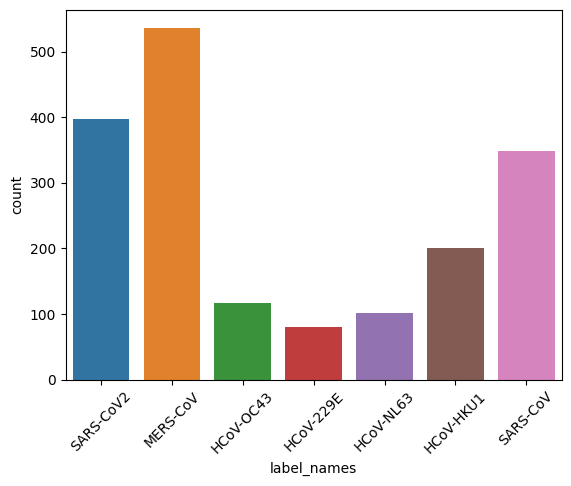

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping the labels to their corresponding names
label_mapping = {
    0: 'SARS-CoV2',
    1: 'MERS-CoV',
    2: 'HCoV-OC43',
    3: 'HCoV-229E',
    4: 'HCoV-NL63',
    5: 'HCoV-HKU1',
    6: 'SARS-CoV'
}

# Replacing label values with their corresponding names
data['label_names'] = data['label'].map(label_mapping)

# Creating the countplot with custom labels
sns.countplot(x=data['label_names'])

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

### Modifying the data by removing some columns

In [ ]:
data.head()

,Sequence ID,Sequence,strain_name,label,label_names
0,NC_045512.2 |Severe acute respiratory syndrome...,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2,0,SARS-CoV2
1,OR177857.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
2,OR177858.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
3,OR177859.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
4,OR177860.1 |Severe acute respiratory syndrome ...,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2


In [ ]:
data.drop('Sequence ID', axis=1, inplace=True)
data

,Sequence,strain_name,label,label_names
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2,0,SARS-CoV2
1,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
2,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
3,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
4,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2
...,...,...,...,...
1565,CTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTC...,sars-cov,6,SARS-CoV
1568,TACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCT...,sars-cov,6,SARS-CoV
1570,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,sars-cov,6,SARS-CoV
1571,TAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTG...,sars-cov,6,SARS-CoV


In [ ]:
### shape of the dataframe
data.shape

(1781, 4)

In [ ]:
## function for transforming genome sequence
nucleotide_values = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4
}

def transform_sequence(sequence):
    result = []
    for nucleotide in sequence:
        value = nucleotide_values.get(nucleotide, 0)
        result.append(value)
    return result


In [ ]:
data['transformed_sequence'] = data['Sequence'].apply(transform_sequence)

In [ ]:
data.head()

,Sequence,strain_name,label,label_names,transformed_sequence
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2,0,SARS-CoV2,"[1, 2, 2, 1, 1, 1, 4, 4, 2, 2, 2, 1, 2, 1, 3, ..."
1,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ..."
2,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ..."
3,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ..."
4,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ..."


In [ ]:
## calculating maximum length of the sequence
max_len = max([len(seq) for seq in data['Sequence']])
print(f"maximum length = {max_len}")

maximum length = 37971


In [ ]:
### Function for making all sequences into same length
def pad_sequence(sequence, padding_size):
    padded_sequence = np.zeros(padding_size)
    padded_sequence[:len(sequence)] = sequence
    return padded_sequence

In [ ]:
data['padded_sequence'] = data['transformed_sequence'].apply(lambda x: pad_sequence(x, max_len))

In [ ]:
data.head()

,Sequence,strain_name,label,label_names,transformed_sequence,padded_sequence
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,sars-cov2,0,SARS-CoV2,"[1, 2, 2, 1, 1, 1, 4, 4, 2, 2, 2, 1, 2, 1, 3, ...","[1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 4.0, 4.0, 2.0, ..."
1,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ...","[2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, ..."
2,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ...","[2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, ..."
3,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ...","[2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, ..."
4,TCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGC...,sars-cov2,0,SARS-CoV2,"[2, 3, 4, 2, 1, 3, 4, 2, 4, 4, 3, 2, 2, 2, 4, ...","[2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 4.0, 2.0, 4.0, ..."


In [ ]:
data.shape

(1781, 6)

In [ ]:
data['padded_sequence'].shape

(1781,)

In [ ]:
### making a new dataframe
new_df = pd.DataFrame(data['padded_sequence'].to_list())
### saving the preprocessed data into 'genome_sequence.csv'
new_df.to_csv('genome_sequence.csv')

In [ ]:
label = data['label']
label.shape

(1781,)

In [ ]:
### saving the labels as 'multi_level.csv'
label.to_csv('multi_label.csv', index=False)

## Implementation starts from here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('genome_sequence.csv')
labels = pd.read_csv('multi_label.csv')
print(f"data.shape = {data.shape}")
print(f"labels.shape = {labels.shape}")

data.shape = (1781, 37972)
labels.shape = (1781, 1)


In [ ]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,37961,37962,37963,37964,37965,37966,37967,37968,37969,37970
0,0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2.0,3.0,4.0,2.0,1.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels.head()

,label
0,0
1,0
2,0
3,0
4,0


<Axes: xlabel='label', ylabel='count'>

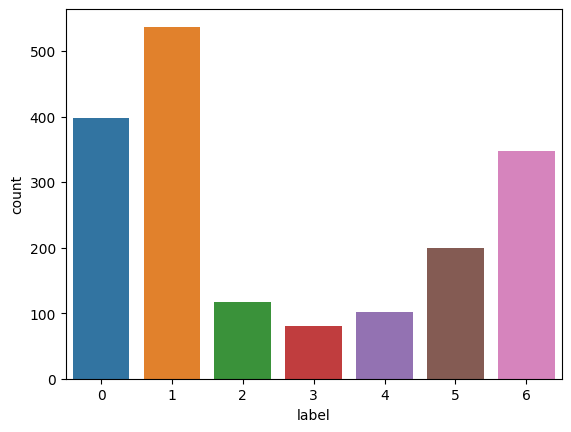

In [ ]:
import seaborn as sns
sns.countplot(x = labels['label'])

In [ ]:
## checking the type of the data
type(data)

pandas.core.frame.DataFrame

In [ ]:
type(labels)

pandas.core.frame.DataFrame

## Converting data and labels into numpy

In [ ]:
X = data.to_numpy()
y = labels.to_numpy()

In [ ]:
X.shape

(1781, 37972)

In [ ]:
y.shape

(1781, 1)

In [ ]:
## reshaping the 'labels' array
y = y.reshape(-1, )

In [ ]:
y.shape

(1781,)

In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## target data is X and label is y


In [ ]:
print(f"X.shape = {X.shape}")
print(f"X[0] = {X[0].shape}")

X.shape = (1781, 37972)
X[0] = (37972,)


In [ ]:
### Reshaping the data
X_data_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
X_data_reshaped.shape

(1781, 37972, 1)

In [ ]:
X_data_reshaped.shape[1:]

(37972, 1)

## spiltting the dataset into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_reshaped, y, test_size = 0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape

(1424, 37972, 1)

In [ ]:
X_test.shape

(357, 37972, 1)

## Training and evaluating using 1 dimensional convnet

In [ ]:
from keras import models
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [ ]:
cnn = models.Sequential([
    layers.Conv1D(64, kernel_size=150, activation='relu', input_shape=(X_data_reshaped.shape[1:])),
    layers.MaxPooling1D(pool_size=5),
    layers.Conv1D(128, 50, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(7, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37823, 64)         9664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7564, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7515, 128)         409728    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3757, 128)        0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 480896)            0         
                                                                 
 dense (Dense)               (None, 7)                 3

In [ ]:
history = cnn.fit(X_train, y_train,
                  epochs=10,
                  batch_size=256,
                  validation_split=0.1)

Epoch 1/10
6/6 [==============================] - 35s 2s/step - loss: 20.5877 - acc: 0.2147 - val_loss: 2.0615 - val_acc: 0.2657
Epoch 2/10
6/6 [==============================] - 5s 862ms/step - loss: 1.5033 - acc: 0.5324 - val_loss: 0.9070 - val_acc: 0.8881
Epoch 3/10
6/6 [==============================] - 5s 853ms/step - loss: 0.5588 - acc: 0.8767 - val_loss: 0.4436 - val_acc: 0.8531
Epoch 4/10
6/6 [==============================] - 5s 887ms/step - loss: 0.2790 - acc: 0.9219 - val_loss: 0.6628 - val_acc: 0.8042
Epoch 5/10
6/6 [==============================] - 5s 886ms/step - loss: 0.3153 - acc: 0.9219 - val_loss: 0.5989 - val_acc: 0.9021
Epoch 6/10
6/6 [==============================] - 5s 884ms/step - loss: 0.2720 - acc: 0.9524 - val_loss: 0.3193 - val_acc: 0.9231
Epoch 7/10
6/6 [==============================] - 5s 861ms/step - loss: 0.1485 - acc: 0.9477 - val_loss: 0.2333 - val_acc: 0.9301
Epoch 8/10
6/6 [==============================] - 5s 856ms/step - loss: 0.0929 - acc: 0.968

In [ ]:
_, acc = cnn.evaluate(X_test, y_test)

12/12 [==============================] - 2s 55ms/step - loss: 0.2422 - acc: 0.9580


In [ ]:
### function for plotting results
import matplotlib.pyplot as plt

def plot_result(history):

    history_dict = history.history
#     print(history_dict.keys())

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'orange', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'orange', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')
    plt.legend()


    plt.show()

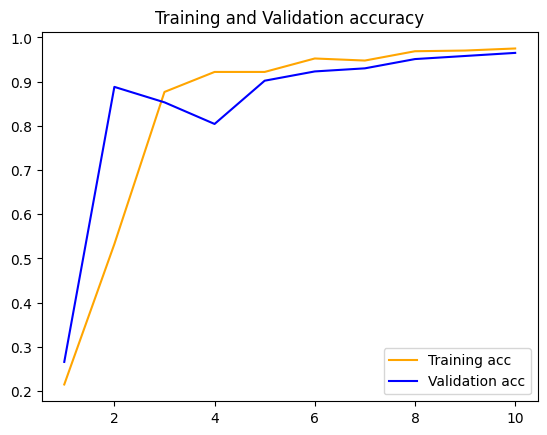

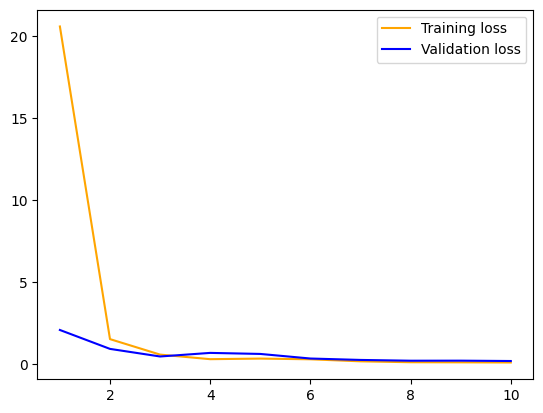

In [ ]:
plot_result(history)

In [ ]:
### calculating 'y_predicted'
y_predicted = cnn.predict(X_test)
y_predicted[0]

12/12 [==============================] - 1s 48ms/step


array([1.0477955e-08, 9.9998915e-01, 6.9714741e-07, 1.8778793e-07,
       2.7137227e-07, 8.5593447e-06, 1.1946076e-06], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

1

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[1, 6, 0, 1, 1]

In [ ]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 76,   1,   0,   0,   0,   0,   0],
       [  2, 104,   0,   0,   0,   1,   0],
       [  0,   0,  15,   0,   0,   1,   1],
       [  0,   0,   0,  14,   1,   1,   0],
       [  0,   0,   0,   1,  24,   0,   0],
       [  0,   1,   0,   1,   0,  38,   1],
       [  0,   0,   0,   0,   1,   2,  71]], dtype=int32)>

### Plotting confusion matrix

In [ ]:
covid_variants = ['sars-cov2', 'mers-cov', 'hCov-OC43', 'hCov-229E', 'hCov-NL63', 'hCov-hkU1', 'sars-cov']

Text(120.72222222222221, 0.5, 'Truth')

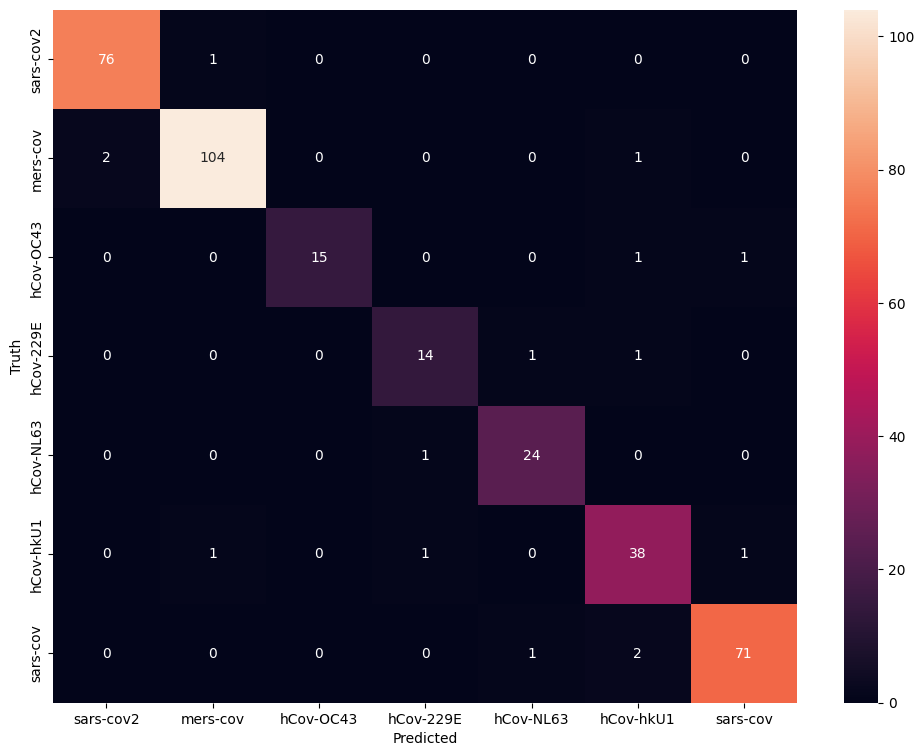

In [ ]:
## plotting confusion matrix
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in covid_variants],
                  columns = [i for i in covid_variants])
plt.figure(figsize = (12, 9))
sn.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# plt.savefig("CNN")

## Plotting classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels, target_names = covid_variants))

Classification Report: 
               precision    recall  f1-score   support

   sars-cov2       0.97      0.99      0.98        77
    mers-cov       0.98      0.97      0.98       107
   hCov-OC43       1.00      0.88      0.94        17
   hCov-229E       0.88      0.88      0.88        16
   hCov-NL63       0.92      0.96      0.94        25
   hCov-hkU1       0.88      0.93      0.90        41
    sars-cov       0.97      0.96      0.97        74

    accuracy                           0.96       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.96      0.96      0.96       357



## Using global maxpooling layer

In [ ]:
cnn2 = models.Sequential([
    layers.Conv1D(64, kernel_size=150, activation='relu', input_shape=(X_data_reshaped.shape[1:])),
    layers.MaxPooling1D(pool_size=5),
    layers.Conv1D(128, 50, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.GlobalMaxPooling1D(),
    layers.Dense(7, activation='softmax')
])

cnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 37823, 64)         9664      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7564, 64)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7515, 128)         409728    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3757, 128)        0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                      

In [ ]:
history_2 = cnn2.fit(X_train, y_train,
                  epochs=15,
                  batch_size=256,
                  validation_split=0.1)

Epoch 1/15
6/6 [==============================] - 6s 934ms/step - loss: 0.3756 - acc: 0.8548 - val_loss: 0.4034 - val_acc: 0.8392
Epoch 2/15
6/6 [==============================] - 6s 914ms/step - loss: 0.3382 - acc: 0.8977 - val_loss: 0.3554 - val_acc: 0.9720
Epoch 3/15
6/6 [==============================] - 6s 938ms/step - loss: 0.3085 - acc: 0.9664 - val_loss: 0.3525 - val_acc: 0.9301
Epoch 4/15
6/6 [==============================] - 6s 921ms/step - loss: 0.2896 - acc: 0.9586 - val_loss: 0.3230 - val_acc: 0.9720
Epoch 5/15
6/6 [==============================] - 6s 914ms/step - loss: 0.2749 - acc: 0.9750 - val_loss: 0.2985 - val_acc: 0.9860
Epoch 6/15
6/6 [==============================] - 6s 939ms/step - loss: 0.2546 - acc: 0.9828 - val_loss: 0.4058 - val_acc: 0.8322
Epoch 7/15
6/6 [==============================] - 6s 950ms/step - loss: 0.4259 - acc: 0.8134 - val_loss: 0.4204 - val_acc: 0.8671
Epoch 8/15
6/6 [==============================] - 6s 910ms/step - loss: 0.2989 - acc: 0.90

In [ ]:
_, acc_2 = cnn2.evaluate(X_test, y_test)

12/12 [==============================] - 1s 40ms/step - loss: 0.2373 - acc: 0.9636


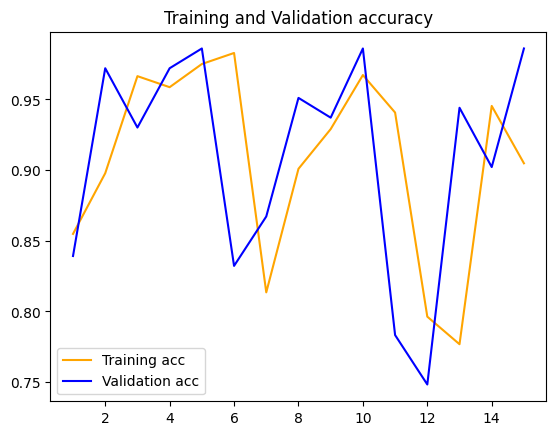

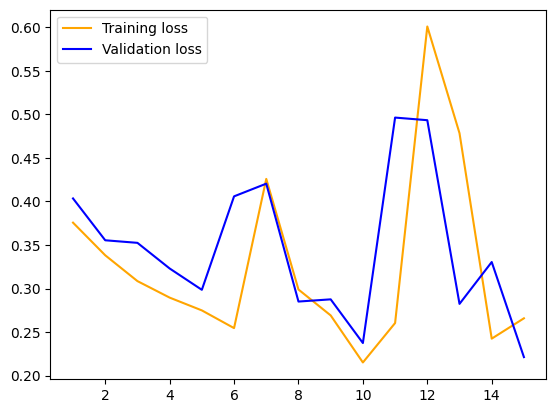

In [ ]:
plot_result(history_2)

In [ ]:
### calculating 'y_predicted'
y_predicted2 = cnn2.predict(X_test)
y_predicted2[0]

12/12 [==============================] - 1s 40ms/step


array([5.5551245e-05, 9.4298524e-01, 3.8705628e-02, 1.3207760e-02,
       4.0457058e-03, 8.7246601e-04, 1.2770348e-04], dtype=float32)

In [ ]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
y_predicted_labels[:5]

[1, 6, 0, 1, 1]

In [ ]:
cm2 = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels2)
cm2

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 77,   0,   0,   0,   0,   0,   0],
       [  2, 103,   2,   0,   0,   0,   0],
       [  0,   0,  16,   1,   0,   0,   0],
       [  0,   0,   1,  14,   0,   1,   0],
       [  0,   0,   0,   0,  22,   2,   1],
       [  0,   0,   0,   0,   0,  40,   1],
       [  0,   0,   0,   0,   0,   2,  72]], dtype=int32)>

### Plotting confusion matrix

Text(120.72222222222221, 0.5, 'Truth')

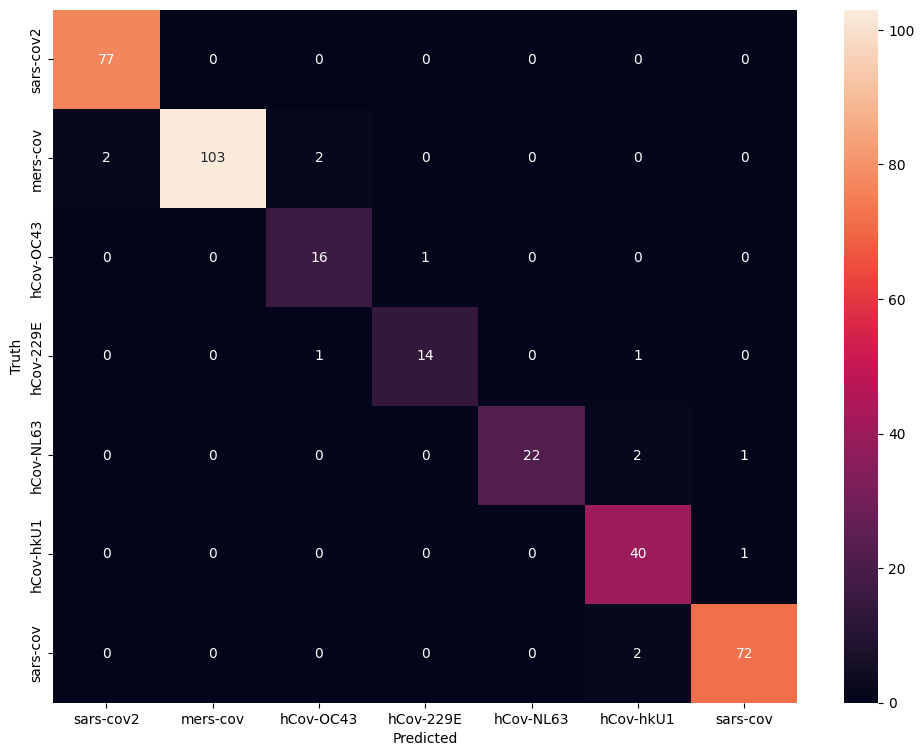

In [ ]:
## plotting confusion matrix
import seaborn as sn
df_cm2 = pd.DataFrame(cm2, index = [i for i in covid_variants],
                  columns = [i for i in covid_variants])
plt.figure(figsize = (12, 9))
sn.heatmap(df_cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# plt.savefig("CNN")

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels2, target_names = covid_variants))

Classification Report: 
               precision    recall  f1-score   support

   sars-cov2       0.97      1.00      0.99        77
    mers-cov       1.00      0.96      0.98       107
   hCov-OC43       0.84      0.94      0.89        17
   hCov-229E       0.93      0.88      0.90        16
   hCov-NL63       1.00      0.88      0.94        25
   hCov-hkU1       0.89      0.98      0.93        41
    sars-cov       0.97      0.97      0.97        74

    accuracy                           0.96       357
   macro avg       0.94      0.94      0.94       357
weighted avg       0.97      0.96      0.96       357

